In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import metrics
from itertools import cycle

In [19]:
#Vectorize Words
class GloveVectorizer:
  def __init__(self):
    # load in pre-trained word vectors
    print('Loading word vectors...')
    word2vec = {}
    embedding = []
    idx2word = []
    with open('glove.6B.50d.txt',encoding='utf-8', errors='ignore') as f:
      # is just a space-separated text file in the format:
      # word vec[0] vec[1] vec[2] ...
      for line in f:
        values = line.split()
        word = values[0]
        vec = np.asarray(values[1:], dtype='float32')
        word2vec[word] = vec
        embedding.append(vec)
        idx2word.append(word)
    print('Found %s word vectors.' % len(word2vec))

    # save for later
    self.word2vec = word2vec
    self.embedding = np.array(embedding)
    self.word2idx = {v:k for k,v in enumerate(idx2word)}
    self.V, self.D = self.embedding.shape

  def fit(self, data):
    pass

  def transform(self, data):
    X = np.zeros((len(data), self.D))
    n = 0
    emptycount = 0
    for sentence in data:
      tokens = sentence.lower().split()
      vecs = []
      for word in tokens:
        if word in self.word2vec:
          vec = self.word2vec[word]
          vecs.append(vec)
      if len(vecs) > 0:
        vecs = np.array(vecs)
        X[n] = vecs.mean(axis=0)
      else:
        emptycount += 1
      n += 1
    print("Numer of samples with no words found: %s / %s" % (emptycount, len(data)))
    return X

  def fit_transform(self, data):
    self.fit(data)
    return self.transform(data)
#-------------------------------------------------------------------------------#
#Dataset & Print first rows
train = pd.read_csv('r8-train-all-terms.txt', header=None, sep='\t')
train.columns = ['label', 'content']
print(train.head())
vectorizer = GloveVectorizer()
Xtrain = vectorizer.fit_transform(train.content)
X = StandardScaler().fit_transform(Xtrain)

#-------------------------------------------------------------------------------#

  label                                            content
0  earn  champion products ch approves stock split cham...
1   acq  computer terminal systems cpml completes sale ...
2  earn  cobanco inc cbco year net shr cts vs dlrs net ...
3  earn  am international inc am nd qtr jan oper shr lo...
4  earn  brown forman inc bfd th qtr net shr one dlr vs...
Loading word vectors...
Found 400000 word vectors.
Numer of samples with no words found: 0 / 5485


Silhouette Coefficient: 0.034


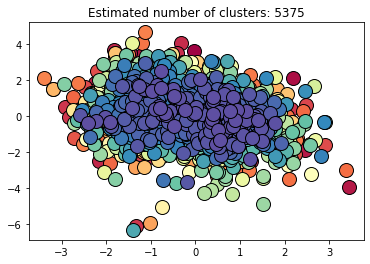

In [39]:
db = DBSCAN(eps=0.9, min_samples=1).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# #############################################################################

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [37]:
sse = []
list_k = list(range(, ))
for k in list_k:
    ds = DBSCAN(eps=k)
    ds.fit(Xtrain)
    sse.append(n_noise_)
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

TypeError: 'float' object cannot be interpreted as an integer